#Análise e Limpeza do Conjunto de Dados (Dataset)

Olá! Neste capítulo iremos análisar o conjunto de dados sobre abóboras. 

O nosso objetivo será extrair o preço médio de abóboras para cada mês do ano. Isto ajudará a identificar o melhor mês para comprarmos abóboras.

Então vamos carregar nosso dataset e começar as análises!

In [31]:
import pandas as pd

#Lendo o arquivo csv
aboboras= pd.read_csv(r"C:\Users\manus\OneDrive\Documentos\ML-For-Beginners\2-Regression\data\US-pumpkins.csv")

#Verificando o dataset
aboboras.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


Já conseguimos observar que o dataset posssui colunas com células vazias ("NaN"). Vamos dar uma olhada melhor na quantidade de células vazias:

In [32]:
aboboras.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

Agora, tendo em vista as colunas do dataset, para conseguirmos extrair o preço médio das abóboras a cada mês do ano, precisaremos:
1. Criar uma nova coluna com o mês baseada na coluna "Date". 
2. Calcular o preço médio para cada lote de abóboras utilizando as colunas "Low Price" e "High Price".
3. Retirar as inconsistências (ex.: Coluna "packages" no formato str e diferente unidades, dificultando a análise)

Olhando a quantidade de colunas vazias, vemos que felizmente as colunas que precisamos não possuem valores vazios, o que é ótimo. Então vamos filtrar somente as colunas necessárias:

In [33]:
#Filtrando as colunas que utilizaremos para análise
aboboras_filtrada=aboboras[['Date','Low Price', 'High Price', 'Package']]

#Visualizando após a filtragem
aboboras_filtrada.tail(10)

,Date,Low Price,High Price,Package
1747,9/28/16,14.75,14.75,22 lb cartons
1748,9/28/16,14.75,14.75,22 lb cartons
1749,9/29/16,10.75,10.75,22 lb cartons
1750,9/29/16,14.75,14.75,22 lb cartons
1751,9/30/16,10.75,10.75,22 lb cartons
1752,9/30/16,14.75,14.75,22 lb cartons
1753,9/26/16,275.00,275.00,36 inch bins
1754,9/27/16,275.00,275.00,36 inch bins
1755,9/28/16,275.00,275.00,36 inch bins
1756,9/29/16,275.00,275.00,36 inch bins


Analisei as colunas através do Data Viewer do VS Code e pude perceber que na na coluna "Package", há diferentes dipos de unidades. Para vocês também conseguirem observar, coloquei para visualizar as últimas 10 linhas (df.tail()), ao invés do df.head().

Temos unidades de medidas como o "inch bins", "lb cartons" e "bushel". Vamos utilizar somente o bushel, pois é uma unidade de medida de capacidade para mercadorias sólidas e secas utilizada nos países anglo-saxões, sendo uma unidade melhor condizente para o objeto estudado (abóboras).

In [34]:
#Filtrando somente 'bushel' da coluna 'Package'
aboboras_filtrada=aboboras_filtrada[aboboras_filtrada['Package'].str.contains('bushel',case=True, regex=True)]

#Visualizando após filtrar somente 'bushel' da coluna 'Package'
aboboras_filtrada.head()

,Date,Low Price,High Price,Package
70,9/24/16,15.0,15.0,1 1/9 bushel cartons
71,9/24/16,18.0,18.0,1 1/9 bushel cartons
72,10/1/16,18.0,18.0,1 1/9 bushel cartons
73,10/1/16,17.0,17.0,1 1/9 bushel cartons
74,10/8/16,15.0,15.0,1 1/9 bushel cartons


Agora estamos aptos para fazer os 2 passos mencionados anteriormente, onde precisamos da coluna mês, e preço médio utilizando as colunas High e Low Price:

In [27]:
#Nova coluna com o mês baseada na coluna "Date"
mes=pd.DatetimeIndex(aboboras_filtrada['Date']).month

#Preço médio
import numpy as np
preco=(aboboras_filtrada['High Price']+aboboras_filtrada['Low Price'])/2

#Adicionando as colunas no DataFrame:
aboboras_filtrada=aboboras_filtrada.assign(Preco=preco, Mes=mes)

aboboras_filtrada.head()

,Date,Low Price,High Price,Package,Preco,Mes
70,9/24/16,15.0,15.0,1 1/9 bushel cartons,15.0,9
71,9/24/16,18.0,18.0,1 1/9 bushel cartons,18.0,9
72,10/1/16,18.0,18.0,1 1/9 bushel cartons,18.0,10
73,10/1/16,17.0,17.0,1 1/9 bushel cartons,17.0,10
74,10/8/16,15.0,15.0,1 1/9 bushel cartons,15.0,10


Como podemos observar acima, a coluna preço não está normalizada em relação aos pacotes, pois eles variam entre 1+1/9 e 1/2. Portanto precisamos normalizar para termos o preço por saca:

In [28]:
#Normalizando o preço (preço por saca)
aboboras_filtrada.loc[aboboras_filtrada['Package'].str.contains('1 1/9'), 'Preco']=preco/(1+(1/9))

aboboras_filtrada.loc[aboboras_filtrada['Package'].str.contains('1/2'), 'Preco']=preco/(1+(1/9))

#Visualizar os preços normalizados por saca
aboboras_filtrada.head()

,Date,Low Price,High Price,Package,Preco,Mes
70,9/24/16,15.0,15.0,1 1/9 bushel cartons,13.5,9
71,9/24/16,18.0,18.0,1 1/9 bushel cartons,16.2,9
72,10/1/16,18.0,18.0,1 1/9 bushel cartons,16.2,10
73,10/1/16,17.0,17.0,1 1/9 bushel cartons,15.3,10
74,10/8/16,15.0,15.0,1 1/9 bushel cartons,13.5,10


Agora vamos plotar nosso gráfico de variação de preço médio por mês (lembrando que este era nosso objetivo neste capítulo):

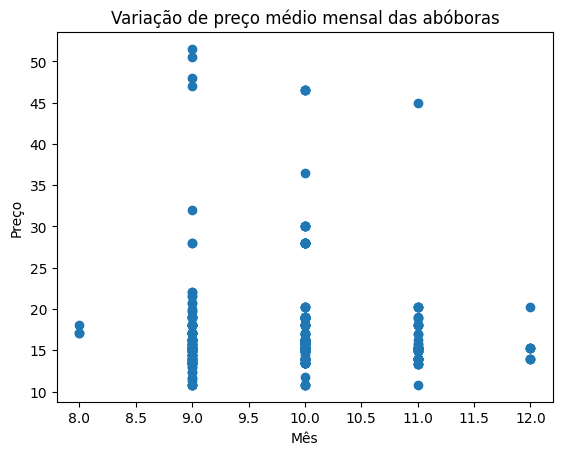

In [29]:
import matplotlib.pyplot as plt


preco=aboboras_filtrada.Preco
mes=aboboras_filtrada.Mes

#X=Preço e Y=Mês
plt.scatter(mes,preco)
plt.xlabel('Mês')
plt.ylabel('Preço')
plt.title('Variação de preço médio mensal das abóboras')
plt.show()

A visualização do tipo scatter não será muito útil neste caso. Vamos que os pontos estão agrupados por colunas, então o gráfico ue faria mais ssentido para melhor visualização, é o de colunas:

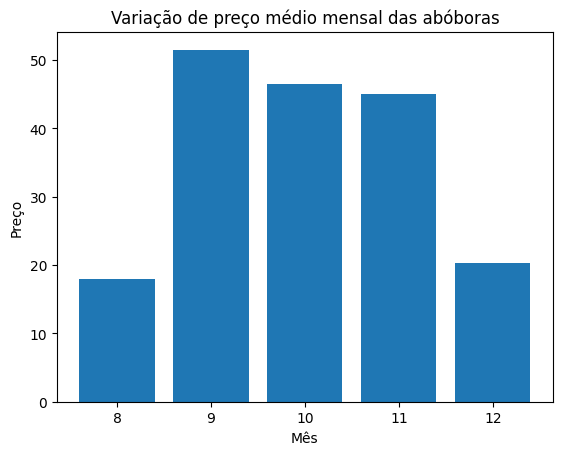

In [43]:
plt.bar(mes,preco)
plt.xlabel('Mês')
plt.ylabel('Preço')
plt.title('Variação de preço médio mensal das abóboras')
plt.show()


O dataset de abóboras foi coletado nos Estados Unidos. Deste modo, podemos ver que o mês mais barato para a compra de abóboras é o mês 12-Dezembro, e no mês de setembro e outubro há um aumento dos preços. Este aumento pode estar relacionado ao Hallowen, que é um evento típico americano no mês de outrubro que utiliza abóboras como decoração e com o aumento da demanda, há o aumento nos preços.